In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random

## California Housing dataset

In [2]:
# Reading the CSV file into a DataFrame
cal = pd.read_csv("california-housing.csv")

# Displaying the first few rows of the DataFrame
cal.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Real Estate Dataset

In [3]:
# Reading the CSV file into a DataFrame
real_estate = pd.read_csv("Dataset-Real-estate.csv")

# Displaying the first few rows of the DataFrame
real_estate.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,USD,1.0,2.0,810 sqft,...,10,NaN,False,https://photos.zillowstatic.com/fp/11176e2f997...,FOR SALE,House for sale,"Marianne Malek, Broker","https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3219-Polk-A...,https://www.zillow.com/san-diego-ca/10_p/
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,USD,3.0,4.0,1996 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/f967921c9db...,FOR SALE,House for sale,NaN,"https://www.zillow.com/homes/San-Jose,-CA_rb/",https://www.zillow.com/homedetails/1801-Willow...,"https://www.zillow.com/homes/San-Jose,-CA_rb/"
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,USD,3.0,2.0,1750 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/c3faafa19ba...,FOR SALE,Condo for sale,First Team Real Estate,"https://www.zillow.com/homes/Carlsbad,-CA_rb/",https://www.zillow.com/homedetails/841-Kalpati...,https://www.zillow.com/carlsbad-ca/3_p/
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,USD,2.0,2.0,1400 sqft,...,2,NaN,False,https://photos.zillowstatic.com/fp/892cd9b3188...,FOR SALE,Townhouse for sale,Coldwell Banker West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3262-Loma-R...,https://www.zillow.com/san-diego-ca/3_p/
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,USD,1.0,1.0,716 sqft,...,61,NaN,False,https://photos.zillowstatic.com/fp/6a4f846cf2c...,FOR SALE,Condo for sale,Realty One Group West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/18614-Camin...,https://www.zillow.com/san-diego-ca/19_p/


In [4]:
# Limiting latitude and longitude values to 2 decimal places
real_estate['latitude'] = real_estate['latitude'].round(2)
real_estate['longitude'] = real_estate['longitude'].round(2)

# Displaying the modified DataFrame
print("\nModified DataFrame with Latitude and Longitude limited to 2 decimal places:")

# Displaying the first few rows of the DataFrame
real_estate.head()


Modified DataFrame with Latitude and Longitude limited to 2 decimal places:


,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.75,-117.12,799000,USD,1.0,2.0,810 sqft,...,10,NaN,False,https://photos.zillowstatic.com/fp/11176e2f997...,FOR SALE,House for sale,"Marianne Malek, Broker","https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3219-Polk-A...,https://www.zillow.com/san-diego-ca/10_p/
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.30,-121.92,2350000,USD,3.0,4.0,1996 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/f967921c9db...,FOR SALE,House for sale,NaN,"https://www.zillow.com/homes/San-Jose,-CA_rb/",https://www.zillow.com/homedetails/1801-Willow...,"https://www.zillow.com/homes/San-Jose,-CA_rb/"
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.15,-117.33,999900,USD,3.0,2.0,1750 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/c3faafa19ba...,FOR SALE,Condo for sale,First Team Real Estate,"https://www.zillow.com/homes/Carlsbad,-CA_rb/",https://www.zillow.com/homedetails/841-Kalpati...,https://www.zillow.com/carlsbad-ca/3_p/
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.76,-117.23,795000,USD,2.0,2.0,1400 sqft,...,2,NaN,False,https://photos.zillowstatic.com/fp/892cd9b3188...,FOR SALE,Townhouse for sale,Coldwell Banker West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3262-Loma-R...,https://www.zillow.com/san-diego-ca/3_p/
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.05,-117.07,450000,USD,1.0,1.0,716 sqft,...,61,NaN,False,https://photos.zillowstatic.com/fp/6a4f846cf2c...,FOR SALE,Condo for sale,Realty One Group West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/18614-Camin...,https://www.zillow.com/san-diego-ca/19_p/


## Merging both datasets

In [5]:
# Merging the two datasets on latitude and longitude
merged_data = pd.merge(cal, real_estate, how='inner', left_on=['latitude', 'longitude'], right_on=['latitude', 'longitude'])

# Displaying the first few rows of the merged dataset
print("\nMerged Dataset:")
merged_data.head()


Merged Dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url
0,-117.74,33.51,29.0,1720.0,269.0,612.0,258.0,7.8239,500001.0,<1H OCEAN,...,142,NaN,False,https://photos.zillowstatic.com/fp/2eac3d25003...,FOR SALE,Lot / Land for sale,EQTY Forbes Global Properties,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/2-Saint-Tro...,https://www.zillow.com/laguna-niguel-ca/2_p/
1,-117.74,33.51,29.0,1720.0,269.0,612.0,258.0,7.8239,500001.0,<1H OCEAN,...,167,NaN,False,https://photos.zillowstatic.com/fp/0bb8bf1168e...,FOR SALE,House for sale,The Oppenheim Group,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/20-Le-Conte...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
2,-117.73,33.53,3.0,6388.0,920.0,2129.0,819.0,7.8915,420600.0,<1H OCEAN,...,47,NaN,False,https://photos.zillowstatic.com/fp/5def253d5c8...,FOR SALE,House for sale,PACIFIC STERLING REALTY,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29-Vista-Mo...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
3,-117.72,33.53,14.0,1672.0,295.0,704.0,293.0,5.1129,251300.0,<1H OCEAN,...,2,NaN,False,https://photos.zillowstatic.com/fp/b2f253a8138...,FOR SALE,House for sale,Property Leaders,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29682-Ellen...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
4,-117.72,33.53,14.0,1672.0,295.0,704.0,293.0,5.1129,251300.0,<1H OCEAN,...,52,NaN,False,https://photos.zillowstatic.com/fp/f938a6676ab...,FOR SALE,House for sale,NATIONAL REALTY GROUP,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29801-Runni...,https://www.zillow.com/laguna-niguel-ca/2_p/


In [6]:
# Saving the merged dataset to a CSV file
merged_data.to_csv("merged_data.csv", index=False)

## Using the merged data for prediction

In [7]:
# Reading the CSV file into a DataFrame
real_estate = pd.read_csv("merged_data.csv")

In [8]:
# Display the size of the dataset
print("Dataset Size:", real_estate.shape)

Dataset Size: (2892, 31)


In [9]:
# Display column names, data types, and other info
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2892 non-null   float64
 1   latitude            2892 non-null   float64
 2   housing_median_age  2892 non-null   float64
 3   total_rooms         2892 non-null   float64
 4   total_bedrooms      2858 non-null   float64
 5   population          2892 non-null   float64
 6   households          2892 non-null   float64
 7   median_income       2892 non-null   float64
 8   median_house_value  2892 non-null   float64
 9   ocean_proximity     2892 non-null   object 
 10  rank                2892 non-null   int64  
 11  property_id         2892 non-null   int64  
 12  address             2892 non-null   object 
 13  price               2892 non-null   int64  
 14  currency            2892 non-null   object 
 15  bathrooms           2831 non-null   float64
 16  bedroo

In [10]:
# Display summary statistics for numerical columns
real_estate.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rank,property_id,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,sold_date
count,2892.000000,2892.000000,2892.000000,2892.000000,2858.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2.892000e+03,2.892000e+03,2831.000000,2837.000000,2.360000e+03,2724.000000,2892.000000,0.0
mean,-118.527915,34.094672,27.437759,2319.271093,517.808607,1243.301521,486.131051,3.673643,221736.578838,332.817773,2.646757e+08,1.515809e+06,2.486401,3.050758,1.449033e+06,4800.605727,31.834025,NaN
std,2.085047,1.975565,12.860261,1474.328493,309.579592,794.438928,281.782836,1.804775,99131.126414,240.398384,6.240278e+08,1.855830e+06,1.297078,1.420271,1.570302e+06,4794.764354,49.614698,NaN
min,-122.020000,32.550000,2.000000,25.000000,5.000000,13.000000,5.000000,0.536000,22500.000000,1.000000,1.538474e+07,0.000000e+00,1.000000,0.000000,1.346000e+05,335.000000,0.000000,NaN
25%,-121.810000,32.750000,17.000000,1419.000000,329.000000,745.500000,315.000000,2.406900,150000.000000,111.000000,1.696349e+07,6.950000e+05,2.000000,2.000000,6.909500e+05,2998.250000,3.000000,NaN
50%,-117.230000,32.810000,27.000000,2034.000000,464.000000,1025.000000,429.000000,3.250000,204200.000000,308.000000,1.969181e+07,1.087995e+06,2.000000,3.000000,1.075200e+06,3848.000000,15.000000,NaN
75%,-117.130000,37.250000,36.000000,2724.000000,624.000000,1533.000000,590.000000,4.599500,274700.000000,511.000000,7.953945e+07,1.695000e+06,3.000000,4.000000,1.675925e+06,4995.000000,38.000000,NaN
max,-117.010000,37.420000,52.000000,16289.000000,4585.000000,8793.000000,4176.000000,13.147700,500001.000000,820.000000,2.146926e+09,3.475000e+07,12.000000,10.000000,3.065230e+07,107390.000000,632.000000,NaN


## Handling the Null Values

In [11]:
# Checking for missing values
real_estate.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms          34
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
rank                     0
property_id              0
address                  0
price                    0
currency                 0
bathrooms               61
bedrooms                55
area                    74
land_area             2848
zestimate              532
rent_zestimate         168
days_on_zillow           0
sold_date             2892
is_zillow_owned          0
image                    0
listing_type             0
status_text              0
broker_name            756
input                    0
property_url             0
listing_url              0
dtype: int64

In [12]:
# Dropping the 'total_bedrooms' column from the merged dataset
real_estate = real_estate.drop(columns=['total_bedrooms', 'sold_date'])

# Displaying the first few rows of the updated merged dataset
print("\nUpdated Merged Dataset:")
real_estate.head()


Updated Merged Dataset:


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rank,...,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url
0,-117.74,33.51,29.0,1720.0,612.0,258.0,7.8239,500001.0,<1H OCEAN,59,...,3245.0,142,False,https://photos.zillowstatic.com/fp/2eac3d25003...,FOR SALE,Lot / Land for sale,EQTY Forbes Global Properties,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/2-Saint-Tro...,https://www.zillow.com/laguna-niguel-ca/2_p/
1,-117.74,33.51,29.0,1720.0,612.0,258.0,7.8239,500001.0,<1H OCEAN,22,...,14049.0,167,False,https://photos.zillowstatic.com/fp/0bb8bf1168e...,FOR SALE,House for sale,The Oppenheim Group,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/20-Le-Conte...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
2,-117.73,33.53,3.0,6388.0,2129.0,819.0,7.8915,420600.0,<1H OCEAN,37,...,17349.0,47,False,https://photos.zillowstatic.com/fp/5def253d5c8...,FOR SALE,House for sale,PACIFIC STERLING REALTY,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29-Vista-Mo...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
3,-117.72,33.53,14.0,1672.0,704.0,293.0,5.1129,251300.0,<1H OCEAN,11,...,4870.0,2,False,https://photos.zillowstatic.com/fp/b2f253a8138...,FOR SALE,House for sale,Property Leaders,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29682-Ellen...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
4,-117.72,33.53,14.0,1672.0,704.0,293.0,5.1129,251300.0,<1H OCEAN,58,...,5234.0,52,False,https://photos.zillowstatic.com/fp/f938a6676ab...,FOR SALE,House for sale,NATIONAL REALTY GROUP,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29801-Runni...,https://www.zillow.com/laguna-niguel-ca/2_p/


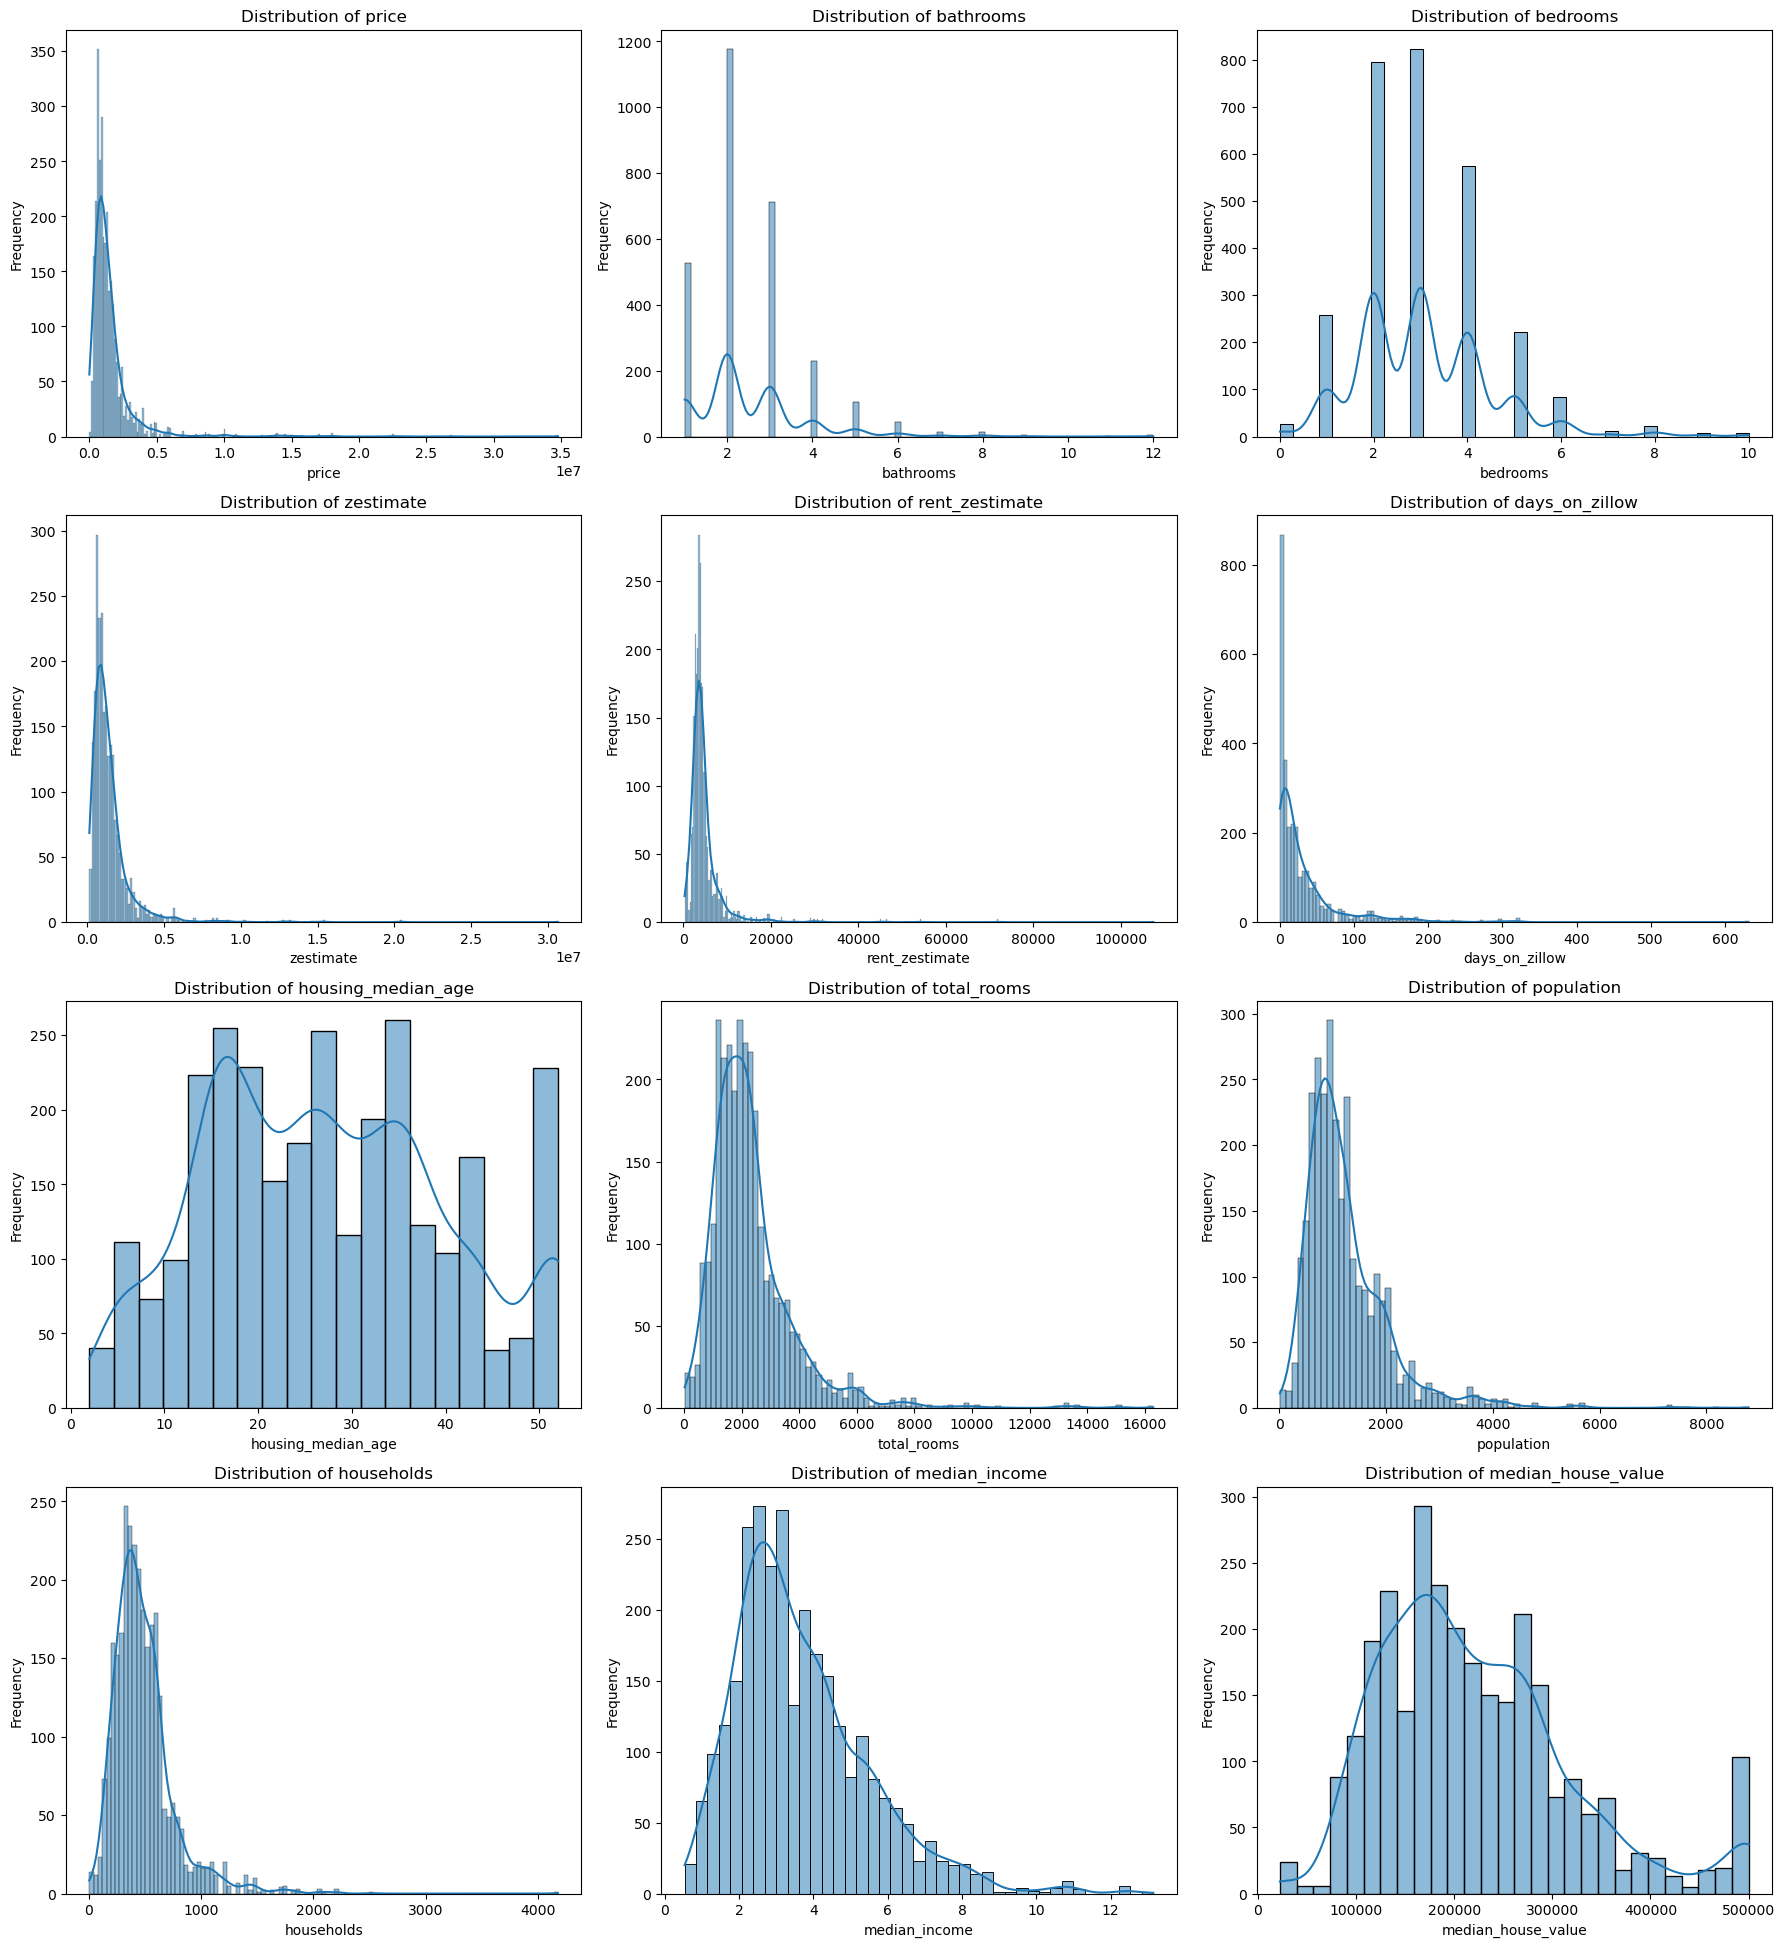

In [13]:
# List of all numeric columns to visualize
numeric_columns = [
    'price', 
    'bathrooms', 
    'bedrooms', 
    'zestimate', 
    'rent_zestimate', 
    'days_on_zillow',
    'housing_median_age', 
    'total_rooms', 
    'population', 
    'households', 
    'median_income', 
    'median_house_value'
]

# Create a figure to display histograms and box plots
plt.figure(figsize=(18, 24))  # Increased height to accommodate more subplots

# Create subplots for each numeric column
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(5, 3, i)  # Adjusted to a 5-row, 3-column layout
    sns.histplot(real_estate[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


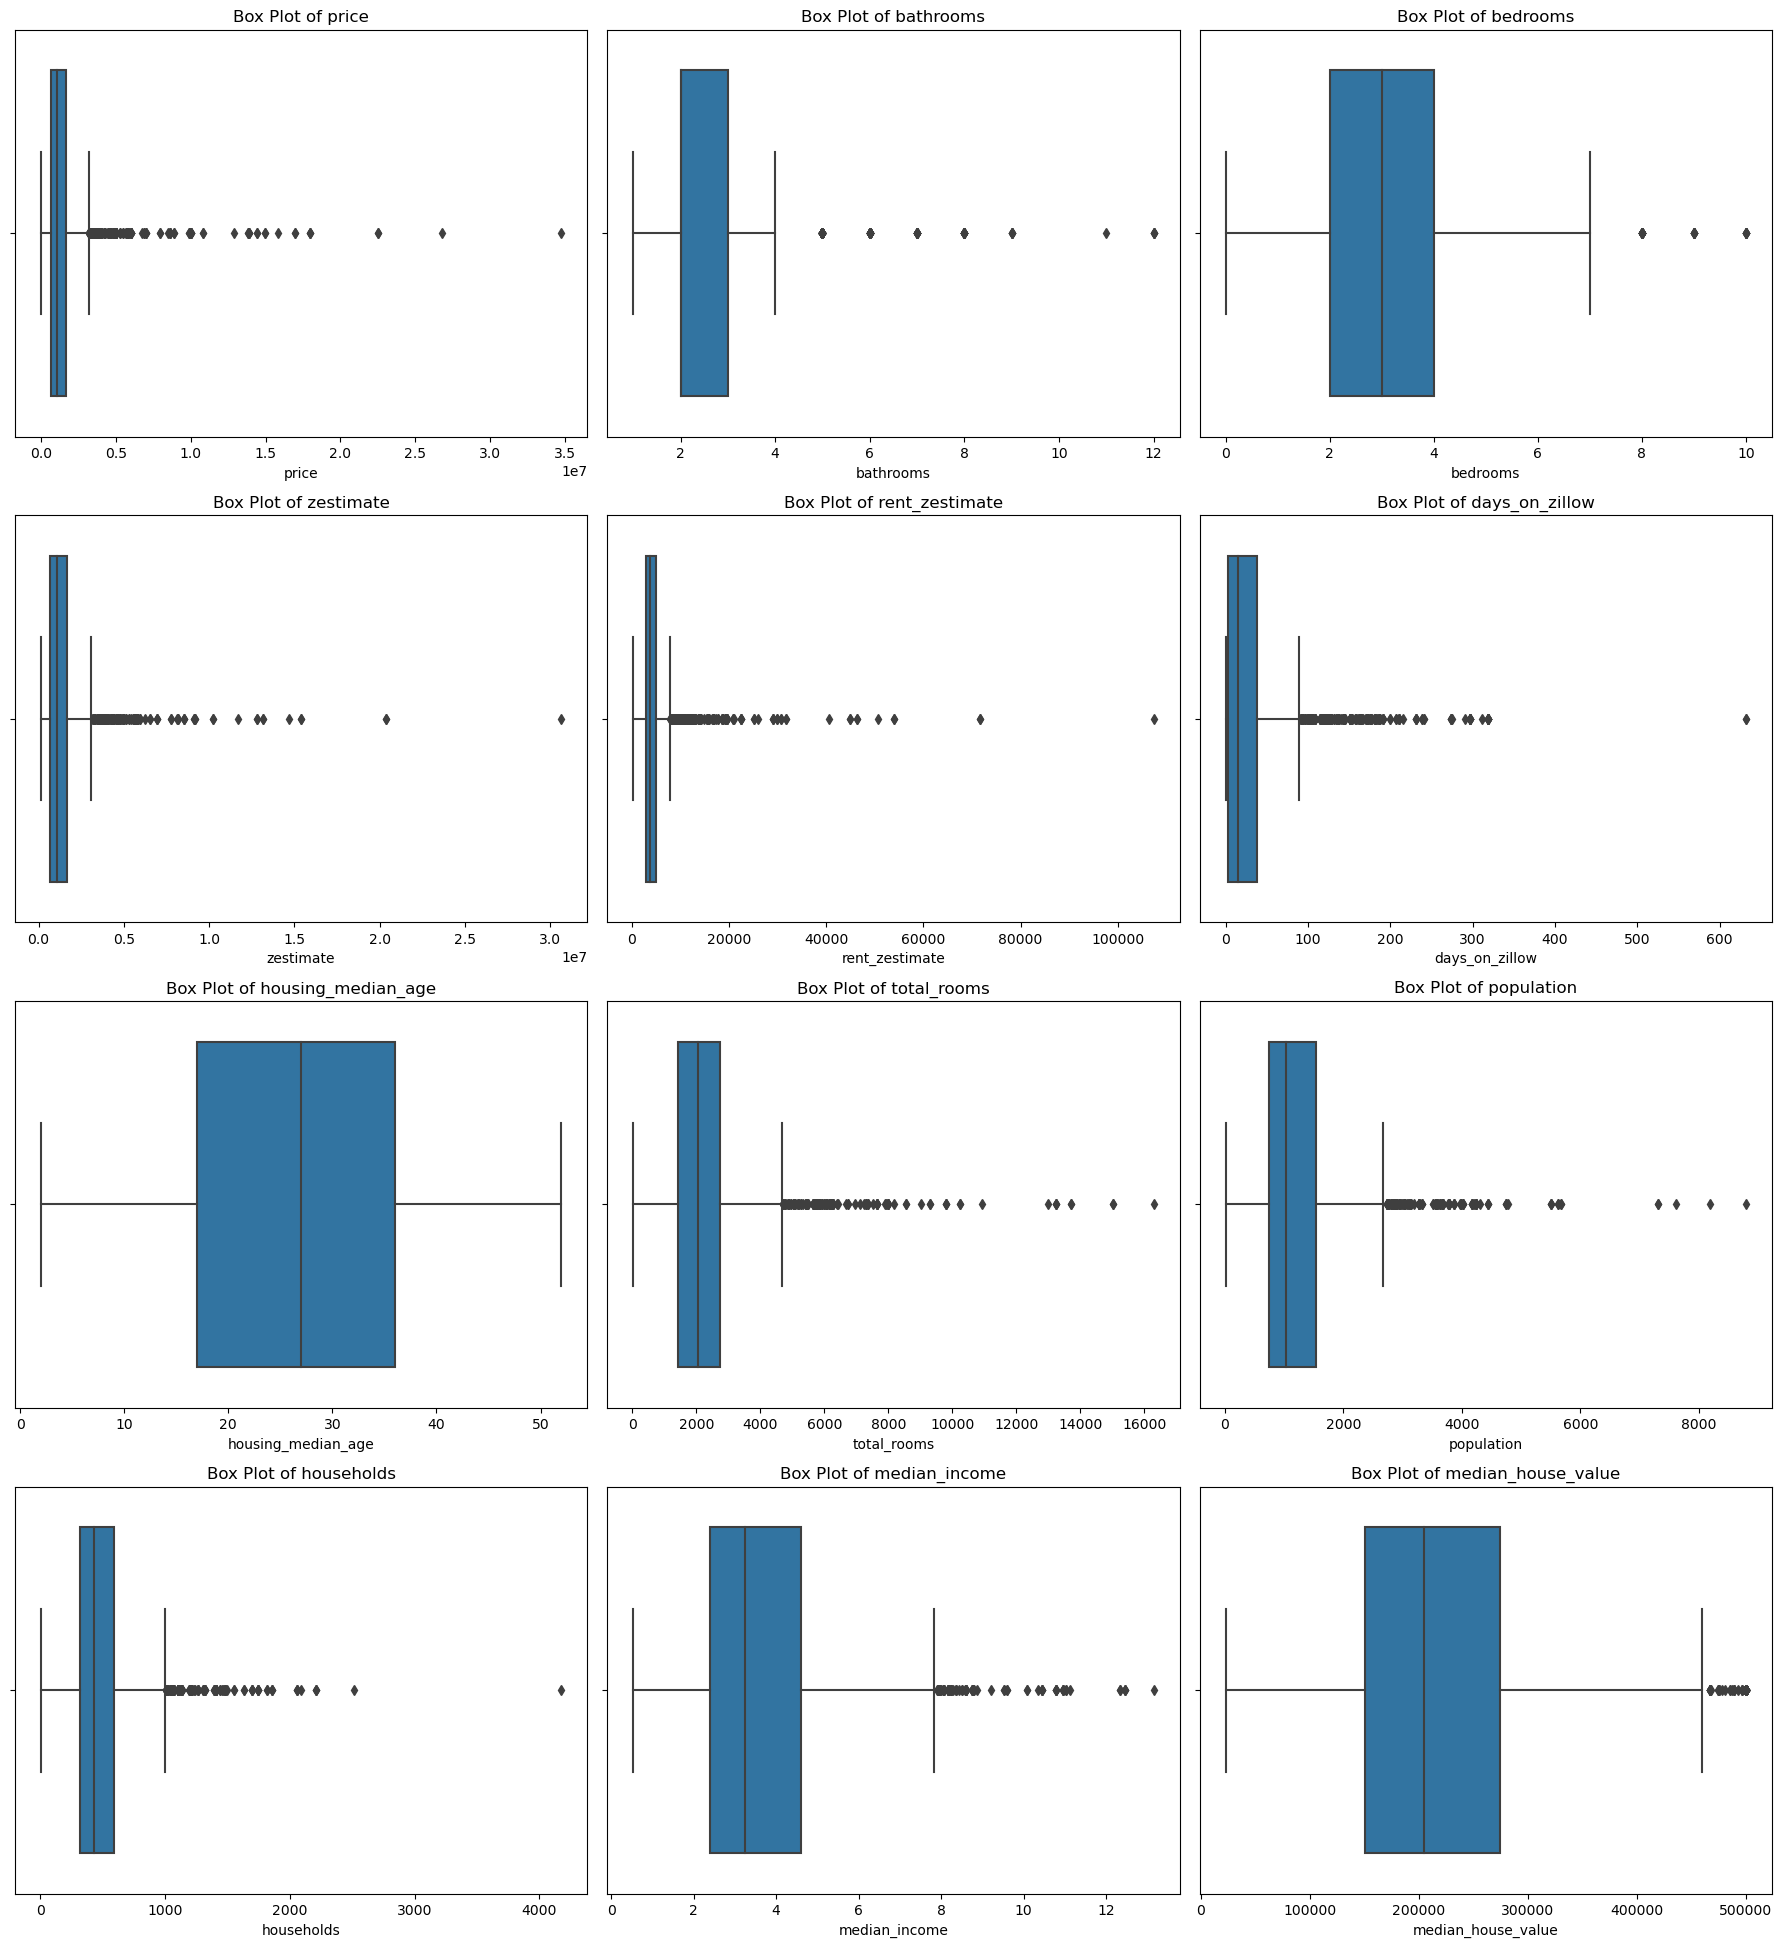

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all numeric columns are of numeric type
for column in numeric_columns:
    real_estate[column] = pd.to_numeric(real_estate[column], errors='coerce')

# Exclude 'land_area' from numeric_columns
numeric_columns_excluded = [col for col in numeric_columns if col != 'land_area']

# Create box plots to visualize outliers
plt.figure(figsize=(18, 24))  # Adjusting the figure size for better visibility

# Create subplots for each numeric column
for i, column in enumerate(numeric_columns_excluded, start=1):
    plt.subplot(5, 3, i)  # Adjusting to a 5-row, 3-column layout
    sns.boxplot(x=real_estate[column])  # x-axis can be adjusted for clarity
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [15]:
# 1. Dropping rows with missing lat/long)
real_estate.dropna(subset=['latitude', 'longitude'], inplace=True)

In [16]:
# Function to convert area and land_area to numeric
def clean_area(value):
    if pd.isnull(value):
        return None
    if isinstance(value, str):
        value = value.replace(',', '')  # Remove commas
        if 'acres' in value:
            # Convert acres to sqft (1 acre = 43,560 sqft)
            return float(value.replace(' acres', '').strip()) * 43560
        elif 'sqft' in value:
            # Remove ' sqft' and convert to float
            return float(value.replace(' sqft', '').strip())
    # Return None if the value is not recognized or is not a string
    return None

# Clean 'area' and 'land_area' columns
real_estate['area'] = real_estate['area'].apply(clean_area)
real_estate['land_area'] = real_estate['land_area'].apply(clean_area)

In [17]:
# 2. Impute missing values with median (because the distribution is skewed and has outliers)
real_estate['bathrooms'].fillna(real_estate['bathrooms'].median(), inplace=True)
real_estate['bedrooms'].fillna(real_estate['bedrooms'].median(), inplace=True)
real_estate['area'].fillna(real_estate['area'].median(), inplace=True)
real_estate['land_area'].fillna(real_estate['land_area'].median(), inplace=True)
real_estate['zestimate'].fillna(real_estate['zestimate'].median(), inplace=True)
real_estate['rent_zestimate'].fillna(real_estate['rent_zestimate'].median(), inplace=True)

In [18]:
# 3. Impute `broker_name` with 'Unknown'
real_estate['broker_name'].fillna('Unknown', inplace=True)

In [19]:
# Checking if all missing values have been handled
print("\nMissing values after imputation:")
print(real_estate.isnull().sum())


Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
rank                  0
property_id           0
address               0
price                 0
currency              0
bathrooms             0
bedrooms              0
area                  0
land_area             0
zestimate             0
rent_zestimate        0
days_on_zillow        0
is_zillow_owned       0
image                 0
listing_type          0
status_text           0
broker_name           0
input                 0
property_url          0
listing_url           0
dtype: int64


In [20]:
# Displaying the first few rows of the updated DataFrame
real_estate.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rank,...,rent_zestimate,days_on_zillow,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url
0,-117.74,33.51,29.0,1720.0,612.0,258.0,7.8239,500001.0,<1H OCEAN,59,...,3245.0,142,False,https://photos.zillowstatic.com/fp/2eac3d25003...,FOR SALE,Lot / Land for sale,EQTY Forbes Global Properties,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/2-Saint-Tro...,https://www.zillow.com/laguna-niguel-ca/2_p/
1,-117.74,33.51,29.0,1720.0,612.0,258.0,7.8239,500001.0,<1H OCEAN,22,...,14049.0,167,False,https://photos.zillowstatic.com/fp/0bb8bf1168e...,FOR SALE,House for sale,The Oppenheim Group,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/20-Le-Conte...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
2,-117.73,33.53,3.0,6388.0,2129.0,819.0,7.8915,420600.0,<1H OCEAN,37,...,17349.0,47,False,https://photos.zillowstatic.com/fp/5def253d5c8...,FOR SALE,House for sale,PACIFIC STERLING REALTY,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29-Vista-Mo...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
3,-117.72,33.53,14.0,1672.0,704.0,293.0,5.1129,251300.0,<1H OCEAN,11,...,4870.0,2,False,https://photos.zillowstatic.com/fp/b2f253a8138...,FOR SALE,House for sale,Property Leaders,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29682-Ellen...,"https://www.zillow.com/homes/Laguna-Niguel,-CA..."
4,-117.72,33.53,14.0,1672.0,704.0,293.0,5.1129,251300.0,<1H OCEAN,58,...,5234.0,52,False,https://photos.zillowstatic.com/fp/f938a6676ab...,FOR SALE,House for sale,NATIONAL REALTY GROUP,"https://www.zillow.com/homes/Laguna-Niguel,-CA...",https://www.zillow.com/homedetails/29801-Runni...,https://www.zillow.com/laguna-niguel-ca/2_p/


In [21]:
# Display column names, data types, and other info
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2892 non-null   float64
 1   latitude            2892 non-null   float64
 2   housing_median_age  2892 non-null   float64
 3   total_rooms         2892 non-null   float64
 4   population          2892 non-null   float64
 5   households          2892 non-null   float64
 6   median_income       2892 non-null   float64
 7   median_house_value  2892 non-null   float64
 8   ocean_proximity     2892 non-null   object 
 9   rank                2892 non-null   int64  
 10  property_id         2892 non-null   int64  
 11  address             2892 non-null   object 
 12  price               2892 non-null   int64  
 13  currency            2892 non-null   object 
 14  bathrooms           2892 non-null   float64
 15  bedrooms            2892 non-null   float64
 16  area  

## Handling the duplicates

In [22]:
# Checking for duplicates in the DataFrame
duplicates = real_estate.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Handling Categorical features

In [23]:
# Displaying unique values in the categorical column
print("Unique values in 'currency':", real_estate['currency'].unique())
print("Unique values in 'listing_type':", real_estate['listing_type'].unique())
print("Unique values in 'status_text':", real_estate['status_text'].unique())
print("Unique values in 'is_zillow_owned':", real_estate['is_zillow_owned'].unique())
print("Unique values in 'ocean_proximity':", real_estate['ocean_proximity'].unique())

Unique values in 'currency': ['USD']
Unique values in 'listing_type': ['FOR SALE']
Unique values in 'status_text': ['Lot / Land for sale' 'House for sale' 'Condo for sale'
 'Townhouse for sale' 'Home for sale' 'New construction'
 'Multi-family home for sale' 'Coming soon' 'Foreclosure' 'Auction']
Unique values in 'is_zillow_owned': [False]
Unique values in 'ocean_proximity': ['<1H OCEAN' 'NEAR OCEAN']


In [24]:
# Dropping irrelevant columns
columns_to_drop = ['image', 'property_url', 'listing_url', 'input']
real_estate.drop(columns=columns_to_drop, inplace=True)

In [25]:
# One-hot encoding for 'status_text'& 'ocean_proximity' to handle multiple categories
real_estate = pd.get_dummies(real_estate, columns=['status_text'], drop_first=True)
real_estate = pd.get_dummies(real_estate, columns=['ocean_proximity'], drop_first=True)

In [26]:
# Displaying the first few rows of the updated DataFrame
real_estate.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,rank,property_id,...,status_text_Coming soon,status_text_Condo for sale,status_text_Foreclosure,status_text_Home for sale,status_text_House for sale,status_text_Lot / Land for sale,status_text_Multi-family home for sale,status_text_New construction,status_text_Townhouse for sale,ocean_proximity_NEAR OCEAN
0,-117.74,33.51,29.0,1720.0,612.0,258.0,7.8239,500001.0,59,2073712579,...,0,0,0,0,0,1,0,0,0,0
1,-117.74,33.51,29.0,1720.0,612.0,258.0,7.8239,500001.0,22,25575465,...,0,0,0,0,1,0,0,0,0,0
2,-117.73,33.53,3.0,6388.0,2129.0,819.0,7.8915,420600.0,37,25572462,...,0,0,0,0,1,0,0,0,0,0
3,-117.72,33.53,14.0,1672.0,704.0,293.0,5.1129,251300.0,11,25571314,...,0,0,0,0,1,0,0,0,0,0
4,-117.72,33.53,14.0,1672.0,704.0,293.0,5.1129,251300.0,58,25571811,...,0,0,0,0,1,0,0,0,0,0


In [27]:
# Display column names, data types, and other info
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   longitude                               2892 non-null   float64
 1   latitude                                2892 non-null   float64
 2   housing_median_age                      2892 non-null   float64
 3   total_rooms                             2892 non-null   float64
 4   population                              2892 non-null   float64
 5   households                              2892 non-null   float64
 6   median_income                           2892 non-null   float64
 7   median_house_value                      2892 non-null   float64
 8   rank                                    2892 non-null   int64  
 9   property_id                             2892 non-null   int64  
 10  address                                 2892 non-null   obje

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select all numeric columns in the DataFrame
numerical_columns = real_estate.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Apply scaling to the selected columns
real_estate[numerical_columns] = scaler.fit_transform(real_estate[numerical_columns])

# Display the first few rows to check the scaling
print("\nScaled Numeric Columns:")
real_estate[numerical_columns].head()



Scaled Numeric Columns:


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,rank,property_id,price,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow
0,0.377954,-0.296003,0.121499,-0.406541,-0.794788,-0.809739,2.299995,2.807519,-1.139214,2.899470,0.907671,-0.370537,-0.035402,-0.033801,0.472612,-0.213989,-0.322092,2.220814
1,0.377954,-0.296003,0.121499,-0.406541,-0.794788,-0.809739,2.299995,2.807519,-1.293151,-0.383223,1.875060,2.742299,0.675598,0.145480,-0.039350,-0.213989,1.997412,2.724784
2,0.382751,-0.285877,-1.900582,2.760194,1.115066,1.181500,2.337458,2.006411,-1.230744,-0.383227,2.244231,3.520509,1.386598,0.271604,-0.039350,2.850382,2.705887,0.305728
3,0.387547,-0.285877,-1.045086,-0.439104,-0.678963,-0.685508,0.797610,0.298277,-1.338917,-0.383229,-0.116846,-0.370537,0.675598,-0.032566,-0.039350,-0.049357,0.026779,-0.601418
4,0.387547,-0.285877,-1.045086,-0.439104,-0.678963,-0.685508,0.797610,0.298277,-1.143374,-0.383229,-0.062413,-0.370537,-0.746403,-0.014238,-0.039350,-0.003342,0.104926,0.406522


___

## EDA's

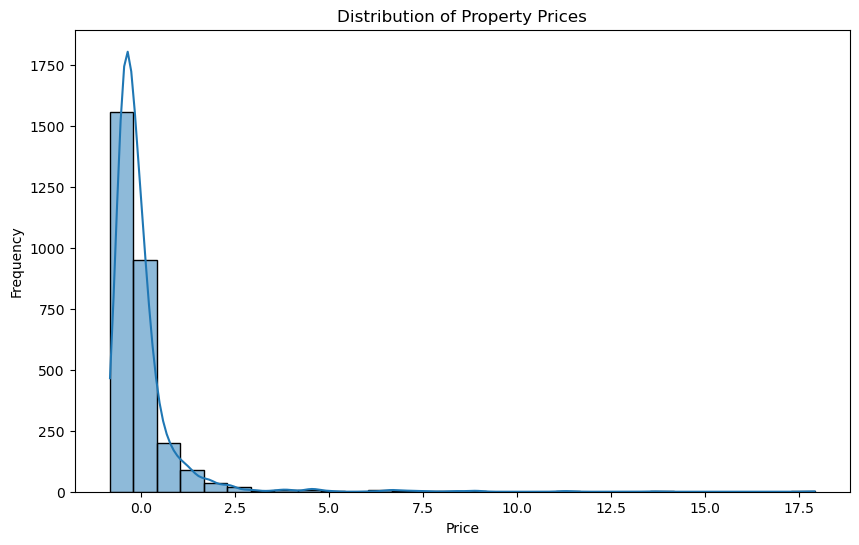

In [29]:
# 1. Visualize the distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(real_estate['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

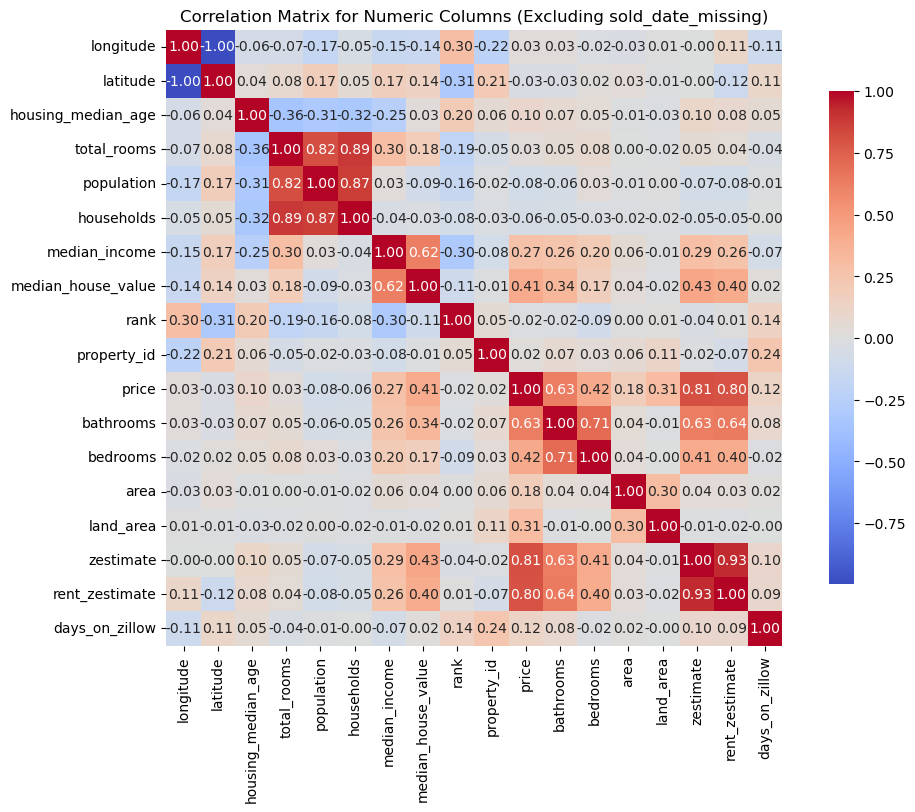

In [30]:
# 2. Analyze the correlation matrix
numeric_columns = real_estate.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix = real_estate[numeric_columns].corr()

# 3. Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Numeric Columns (Excluding sold_date_missing)')
plt.show()

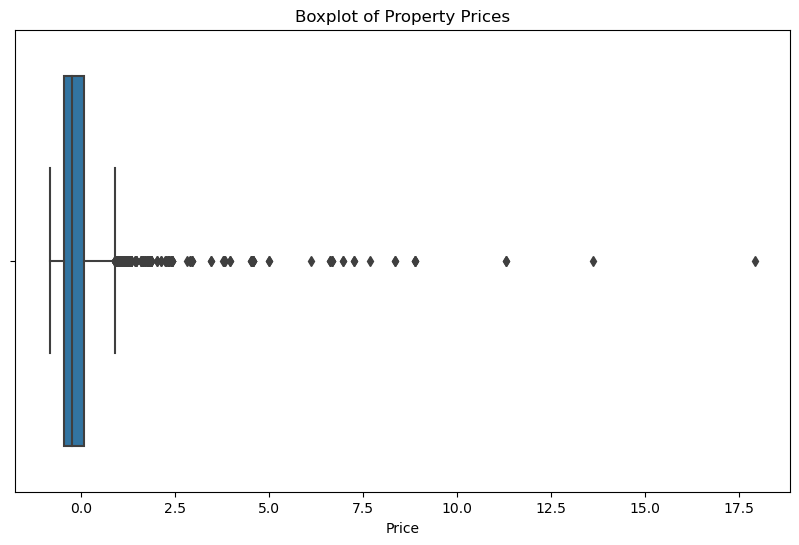

In [31]:
# 4. Identify outliers using boxplots (there are many outliers, which needs to be transformed/removed)
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=real_estate)
plt.title('Boxplot of Property Prices')
plt.xlabel('Price')
plt.show()

/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


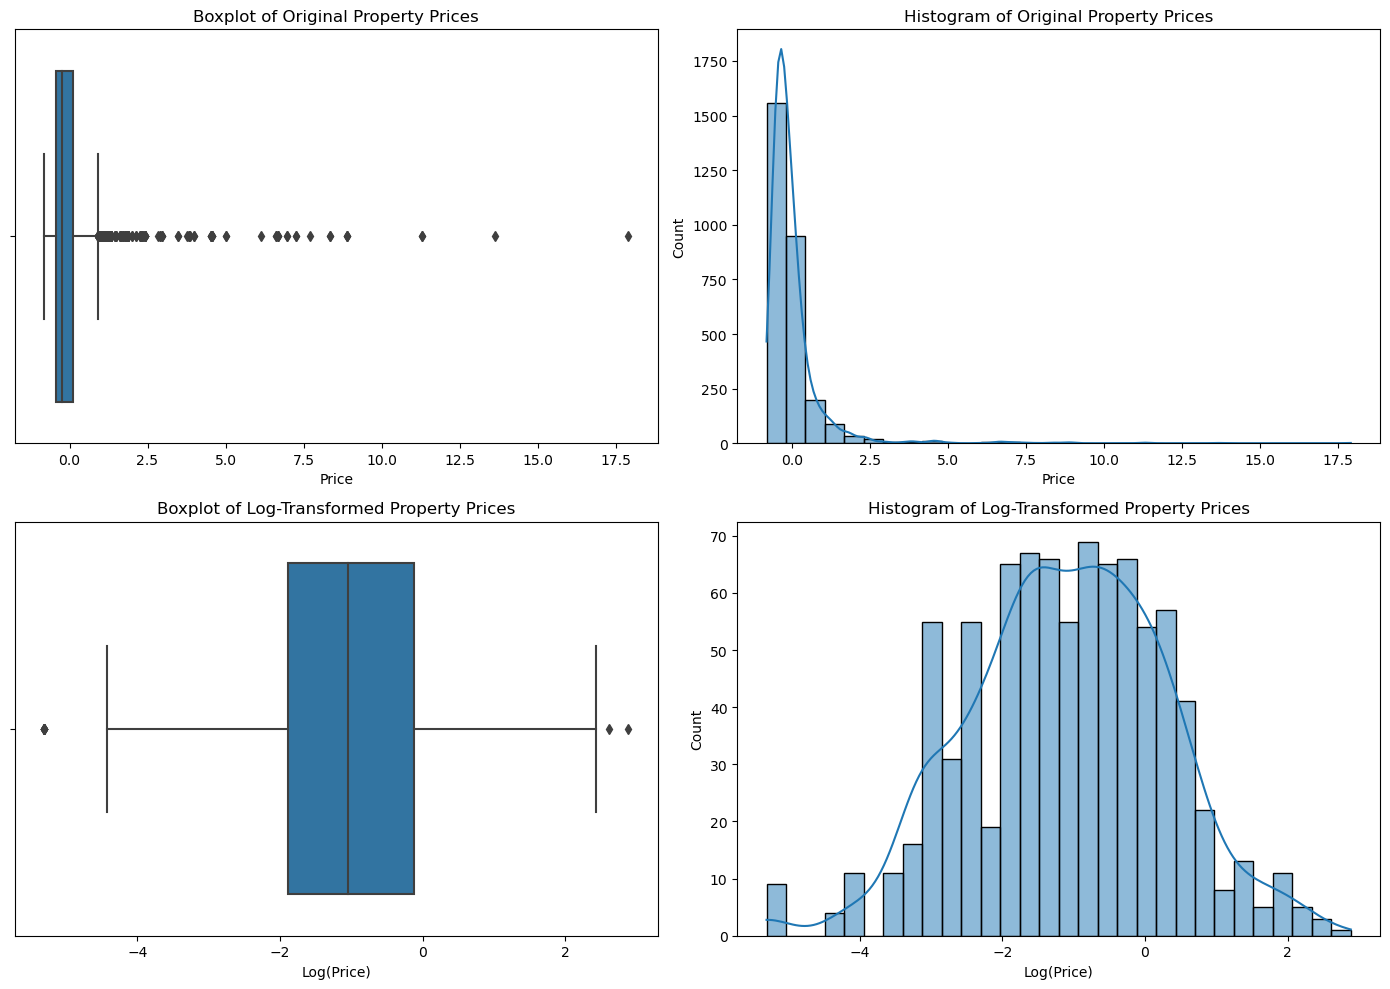

Statistical Summary of Original Prices:
 count    2.892000e+03
mean     3.439695e-17
std      1.000173e+00
min     -8.169234e-01
25%     -4.423631e-01
50%     -2.305641e-01
75%      9.657259e-02
max      1.791109e+01
Name: price, dtype: float64

Statistical Summary of Log-Transformed Prices:
 count    884.000000
mean      -1.103486
std        1.384383
min       -5.307657
25%       -1.894017
50%       -1.042982
75%       -0.127072
max        2.885420
Name: log_price, dtype: float64


In [32]:
## Transforming the outliers rather than removing as we there are many records
# Create a copy of the original price column
real_estate['log_price'] = np.log(real_estate['price'])

# Plotting the original and transformed price distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot for original price
sns.boxplot(x='price', data=real_estate, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Original Property Prices')
axes[0, 0].set_xlabel('Price')

# Histogram for original price
sns.histplot(real_estate['price'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Original Property Prices')
axes[0, 1].set_xlabel('Price')

# Boxplot for log-transformed price
sns.boxplot(x='log_price', data=real_estate, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Log-Transformed Property Prices')
axes[1, 0].set_xlabel('Log(Price)')

# Histogram for log-transformed price
sns.histplot(real_estate['log_price'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Log-Transformed Property Prices')
axes[1, 1].set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

# Statistical summary before and after transformation
original_stats = real_estate['price'].describe()
log_transformed_stats = real_estate['log_price'].describe()

print("Statistical Summary of Original Prices:\n", original_stats)
print("\nStatistical Summary of Log-Transformed Prices:\n", log_transformed_stats)

## Create Future Price Targets columns

In [33]:
# Step 1: Calculate future prices
annual_increase_rate = 0.05  # Assumption: 5% annual increase

real_estate['price_1yr'] = real_estate['price'] * (1 + annual_increase_rate)
real_estate['price_2yr'] = real_estate['price'] * (1 + annual_increase_rate) ** 2
real_estate['price_5yr'] = real_estate['price'] * (1 + annual_increase_rate) ** 5

# Drop rows with NaN values resulting from the shift
real_estate.dropna(subset=['price_1yr', 'price_2yr', 'price_5yr'], inplace=True)

In [34]:
# Dropping irrelevant columns from the DataFrame
columns_to_drop = [
    'rank',
    'property_id',
    'address',
    'currency',
    'listing_type',
    'broker_name'
]

# Dropping the specified columns
real_estate_cleaned = real_estate.drop(columns=columns_to_drop)

# Display the cleaned DataFrame's columns to verify
print(real_estate_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   longitude                               2892 non-null   float64
 1   latitude                                2892 non-null   float64
 2   housing_median_age                      2892 non-null   float64
 3   total_rooms                             2892 non-null   float64
 4   population                              2892 non-null   float64
 5   households                              2892 non-null   float64
 6   median_income                           2892 non-null   float64
 7   median_house_value                      2892 non-null   float64
 8   price                                   2892 non-null   float64
 9   bathrooms                               2892 non-null   float64
 10  bedrooms                                2892 non-null   floa

# Price Prediction for Year 2

In [35]:
# Step 2: Drop rows with NaN values resulting from the calculations
real_estate_cleaned.dropna(subset=['price_1yr', 'price_2yr', 'price_5yr'], inplace=True)

# Step 3: Define input features and target variable
# Using 'price_2yr' as the target variable, you can do similarly for others
X = real_estate_cleaned.drop(columns=['price', 'price_1yr', 'price_2yr', 'price_5yr', 'log_price'])
y = real_estate_cleaned['price_2yr']  # Change this if you want to predict other prices

# Step 4: Split the data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Random Forest

In [36]:
# Step 5: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r_squared:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
R-squared: 0.93
Mean Absolute Error (MAE): 0.08


In [37]:
# Step 8: Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', 0.1, 0.2],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 9: Get the best parameters and model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Step 10: Make predictions with the best model
y_pred_tuned = best_rf_model.predict(X_test)

# Step 11: Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r_squared_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

# Print evaluation metrics for the tuned model
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error (MSE): {mse_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"R-squared: {r_squared_tuned:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned:.2f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
115 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/pranavramesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramet

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R-squared: 0.90
Mean Absolute Error (MAE): 0.13


## Model 2: Decision Tree

In [38]:
# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_dt = dt_model.predict(X_test)

# Step 7: Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r_squared_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared: {r_squared_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")

Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
R-squared: 0.93
Mean Absolute Error (MAE): 0.06


In [39]:
# Step 5: Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10]
}

# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Step 6: Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Step 7: Fit GridSearchCV to training data
grid_search_dt.fit(X_train, y_train)

# Step 8: Get the best parameters and the best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Step 9: Make predictions using the best model
y_pred_tuned_dt = best_dt_model.predict(X_test)

# Step 10: Evaluate the tuned Decision Tree model
mse_tuned_dt = mean_squared_error(y_test, y_pred_tuned_dt)
rmse_tuned_dt = np.sqrt(mse_tuned_dt)
r_squared_tuned_dt = r2_score(y_test, y_pred_tuned_dt)
mae_tuned_dt = mean_absolute_error(y_test, y_pred_tuned_dt)

# Print evaluation metrics for the tuned Decision Tree model
print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Mean Squared Error (MSE): {mse_tuned_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_dt:.2f}")
print(f"R-squared: {r_squared_tuned_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_dt:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Decision Tree: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.34
R-squared: 0.92
Mean Absolute Error (MAE): 0.06


## Model 3: Gradient Boost

In [40]:
# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_gb = gb_model.predict(X_test)

# Step 7: Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r_squared_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Print evaluation metrics
print(f"Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared: {r_squared_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")

Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.28
R-squared: 0.95
Mean Absolute Error (MAE): 0.12


In [41]:
# Step 5: Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [100, 200, 300],                # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.05],             # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],                         # Maximum depth of each tree
    'min_samples_split': [2, 10, 20],               # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]          # Number of features to consider for the best split
}

# Step 6: Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Step 7: Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist_gb,
                                       n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error',
                                       random_state=42)

# Step 8: Fit RandomizedSearchCV to training data
random_search_gb.fit(X_train, y_train)

# Step 9: Get the best parameters and the best model
best_params_gb = random_search_gb.best_params_
best_gb_model = random_search_gb.best_estimator_

# Step 10: Make predictions using the best model
y_pred_tuned_gb = best_gb_model.predict(X_test)

# Step 11: Evaluate the tuned Gradient Boosting model
mse_tuned_gb = mean_squared_error(y_test, y_pred_tuned_gb)
rmse_tuned_gb = np.sqrt(mse_tuned_gb)
r_squared_tuned_gb = r2_score(y_test, y_pred_tuned_gb)
mae_tuned_gb = mean_absolute_error(y_test, y_pred_tuned_gb)

# Print evaluation metrics for the tuned Gradient Boosting model
print(f"Best Parameters for Gradient Boosting: {best_params_gb}")
print(f"Mean Squared Error (MSE): {mse_tuned_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_gb:.2f}")
print(f"R-squared: {r_squared_tuned_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_gb:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for Gradient Boosting: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
R-squared: 0.96
Mean Absolute Error (MAE): 0.09


## Model 4: Linear Regression

In [42]:
# Step 1: Initialize the Linear Regression model
linear_model = LinearRegression()

# Step 2: Train the model
linear_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_linear = linear_model.predict(X_test)

# Step 4: Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r_squared_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Print evaluation metrics
print(f"Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared: {r_squared_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R-squared: 0.90
Mean Absolute Error (MAE): 0.21


## Ridge Regression

In [43]:
# Step 5: Define the parameter grid for Ridge regression
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False]  # Fit intercept or not
}

# Step 6: Initialize the Ridge regression model
ridge_model = Ridge()

# Step 7: Initialize GridSearchCV for Ridge regression
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge,
                                   cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
                                   verbose=2)

# Step 8: Fit GridSearchCV to training data
grid_search_ridge.fit(X_train, y_train)

# Step 9: Get the best parameters and the best model
best_params_ridge = grid_search_ridge.best_params_
best_ridge_model = grid_search_ridge.best_estimator_

# Step 10: Make predictions using the best Ridge model
y_pred_tuned_ridge = best_ridge_model.predict(X_test)

# Step 11: Evaluate the tuned Ridge model
mse_tuned_ridge = mean_squared_error(y_test, y_pred_tuned_ridge)
rmse_tuned_ridge = np.sqrt(mse_tuned_ridge)
r_squared_tuned_ridge = r2_score(y_test, y_pred_tuned_ridge)
mae_tuned_ridge = mean_absolute_error(y_test, y_pred_tuned_ridge)

# Print evaluation metrics for the tuned Ridge model
print(f"Best Parameters for Ridge Regression: {best_params_ridge}")
print(f"Mean Squared Error (MSE): {mse_tuned_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_ridge:.2f}")
print(f"R-squared: {r_squared_tuned_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_ridge:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Ridge Regression: {'alpha': 100, 'fit_intercept': False}
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
R-squared: 0.90
Mean Absolute Error (MAE): 0.21


## Lasso Regression

In [44]:
# Step 6: Define the parameter grid for Lasso regression
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False]  # Fit intercept or not
}

# Step 7: Initialize the Lasso regression model
lasso_model = Lasso()

# Step 8: Initialize GridSearchCV for Lasso regression
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso,
                                   cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
                                   verbose=2)

# Step 9: Fit GridSearchCV to training data
grid_search_lasso.fit(X_train, y_train)

# Step 10: Get the best parameters and the best model
best_params_lasso = grid_search_lasso.best_params_
best_lasso_model = grid_search_lasso.best_estimator_

# Step 11: Make predictions using the best Lasso model
y_pred_tuned_lasso = best_lasso_model.predict(X_test)

# Step 12: Evaluate the tuned Lasso model
mse_tuned_lasso = mean_squared_error(y_test, y_pred_tuned_lasso)
rmse_tuned_lasso = np.sqrt(mse_tuned_lasso)
r_squared_tuned_lasso = r2_score(y_test, y_pred_tuned_lasso)
mae_tuned_lasso = mean_absolute_error(y_test, y_pred_tuned_lasso)

# Print evaluation metrics for the tuned Lasso model
print(f"Best Parameters for Lasso Regression: {best_params_lasso}")
print(f"Mean Squared Error (MSE): {mse_tuned_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_lasso:.2f}")
print(f"R-squared: {r_squared_tuned_lasso:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_lasso:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Lasso Regression: {'alpha': 0.1, 'fit_intercept': False}
Mean Squared Error (MSE): 0.27
Root Mean Squared Error (RMSE): 0.52
R-squared: 0.83
Mean Absolute Error (MAE): 0.21


## Model 5: XGBoost

In [45]:
# Step 1: Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 4: Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r_squared_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Step 5: Print evaluation metrics
print(f"XGBoost Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared: {r_squared_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")

XGBoost Regressor Metrics:
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26
R-squared: 0.96
Mean Absolute Error (MAE): 0.07


In [46]:
# Step 5: Define the parameter distribution for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],              # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.05],           # Step size shrinkage
    'max_depth': [3, 5, 7],                       # Maximum depth of a tree
    'min_child_weight': [1, 2, 4],                # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],                 # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]           # Subsample ratio of columns when constructing each tree
}

# Step 6: Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 7: Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                        n_iter=50, cv=5, n_jobs=-1, verbose=2,
                                        scoring='neg_mean_squared_error', random_state=42)

# Step 8: Fit RandomizedSearchCV to training data
random_search_xgb.fit(X_train, y_train)

# Step 9: Get the best parameters and the best model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

# Step 10: Make predictions using the best model
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

# Step 11: Evaluate the tuned XGBoost model
mse_tuned_xgb = mean_squared_error(y_test, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(mse_tuned_xgb)
r_squared_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)
mae_tuned_xgb = mean_absolute_error(y_test, y_pred_tuned_xgb)

# Print evaluation metrics for the tuned XGBoost model
print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Mean Squared Error (MSE): {mse_tuned_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_xgb:.2f}")
print(f"R-squared: {r_squared_tuned_xgb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tuned_xgb:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.2s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=5, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.5s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.7s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.7s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=50; to

Best Parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30
R-squared: 0.94
Mean Absolute Error (MAE): 0.12


## Model 6: SVR Regressor

In [47]:
# Step 1: Initialize the Support Vector Regressor model
svr_model = SVR(kernel='rbf')  

# Step 2: Train the model
svr_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_svr = svr_model.predict(X_test)

# Step 4: Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r_squared_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Step 5: Print evaluation metrics
print(f"Support Vector Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared: {r_squared_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")

Support Vector Regressor Metrics:
Mean Squared Error (MSE): 0.62
Root Mean Squared Error (RMSE): 0.78
R-squared: 0.60
Mean Absolute Error (MAE): 0.20


## Model 7: LSTM (Long Short Term Memory)

Epoch 1/150
15/15 [==============================] - 5s 44ms/step - loss: 1.0087 - mae: 0.4708 - val_loss: 0.6329 - val_mae: 0.3383
Epoch 2/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6008 - mae: 0.2950 - val_loss: 0.4170 - val_mae: 0.2670
Epoch 3/150
15/15 [==============================] - 0s 4ms/step - loss: 0.4488 - mae: 0.2492 - val_loss: 0.3257 - val_mae: 0.2610
Epoch 4/150
15/15 [==============================] - 0s 4ms/step - loss: 0.3996 - mae: 0.2433 - val_loss: 0.2968 - val_mae: 0.2462
Epoch 5/150
15/15 [==============================] - 0s 21ms/step - loss: 0.3363 - mae: 0.2213 - val_loss: 0.2527 - val_mae: 0.2180
Epoch 6/150
15/15 [==============================] - 0s 6ms/step - loss: 0.3160 - mae: 0.2144 - val_loss: 0.2215 - val_mae: 0.2090
Epoch 7/150
15/15 [==============================] - 0s 5ms/step - loss: 0.2739 - mae: 0.2071 - val_loss: 0.2070 - val_mae: 0.2016
Epoch 8/150
15/15 [==============================] - 0s 5ms/step - loss: 0.2237 -

15/15 [==============================] - 0s 7ms/step - loss: 0.0413 - mae: 0.1129 - val_loss: 0.0710 - val_mae: 0.1244
Epoch 64/150
15/15 [==============================] - 0s 7ms/step - loss: 0.0501 - mae: 0.1173 - val_loss: 0.0881 - val_mae: 0.1278
Epoch 65/150
15/15 [==============================] - 0s 6ms/step - loss: 0.0496 - mae: 0.1186 - val_loss: 0.0607 - val_mae: 0.1241
Epoch 66/150
15/15 [==============================] - 0s 16ms/step - loss: 0.0374 - mae: 0.1154 - val_loss: 0.0862 - val_mae: 0.1385
Epoch 67/150
15/15 [==============================] - 0s 11ms/step - loss: 0.0493 - mae: 0.1192 - val_loss: 0.0693 - val_mae: 0.1256
Epoch 68/150
15/15 [==============================] - 0s 9ms/step - loss: 0.0397 - mae: 0.1158 - val_loss: 0.0747 - val_mae: 0.1250
Epoch 69/150
15/15 [==============================] - 0s 11ms/step - loss: 0.0430 - mae: 0.1201 - val_loss: 0.0620 - val_mae: 0.1231
Epoch 70/150
15/15 [==============================] - 0s 12ms/step - loss: 0.0386 - ma

Epoch 125/150
15/15 [==============================] - 0s 9ms/step - loss: 0.0311 - mae: 0.0994 - val_loss: 0.0801 - val_mae: 0.1196
Epoch 126/150
15/15 [==============================] - 0s 10ms/step - loss: 0.0207 - mae: 0.0959 - val_loss: 0.0861 - val_mae: 0.1124
Epoch 127/150
15/15 [==============================] - 0s 8ms/step - loss: 0.0265 - mae: 0.0982 - val_loss: 0.0928 - val_mae: 0.1215
Epoch 128/150
15/15 [==============================] - 0s 8ms/step - loss: 0.0229 - mae: 0.0961 - val_loss: 0.0791 - val_mae: 0.1208
Epoch 129/150
15/15 [==============================] - 0s 10ms/step - loss: 0.0226 - mae: 0.0977 - val_loss: 0.0742 - val_mae: 0.1106
Epoch 130/150
15/15 [==============================] - 0s 8ms/step - loss: 0.0210 - mae: 0.0947 - val_loss: 0.0725 - val_mae: 0.1103
Epoch 131/150
15/15 [==============================] - 0s 16ms/step - loss: 0.0225 - mae: 0.0948 - val_loss: 0.0776 - val_mae: 0.1117
Epoch 132/150
15/15 [==============================] - 0s 15ms/ste

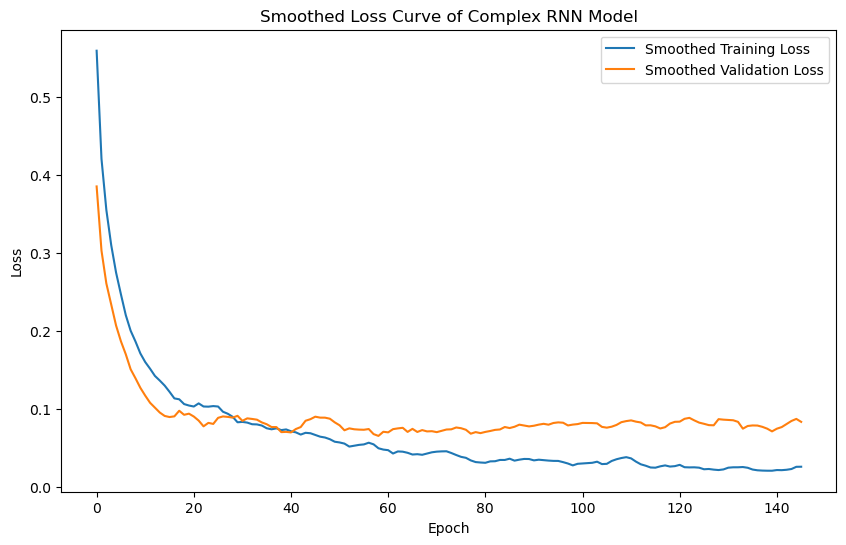

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_lea

[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   4.4s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=5, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.3s
[CV] END max_depth=15, max_features=0.1, min_samples_leaf=6, min_samples_split=5, n_estimators=400; total time=   2.9s
[CV] END max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   6.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=

[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.8s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=5, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   1.1s
[CV] END max_depth=5, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.4s
[CV] END max_depth=15, max_features=0.1, min_samples_leaf=6, min_samples_split=5, n_estimators=400; total time=   3.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=30, max_features=0.1, mi

[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=  11.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  18.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   3.2s
[CV] END learning_rate=0

[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=20, max_features=0.1, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   5.3s
[CV] END max_depth=None, max_features=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=25, max_features=0.2, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=log2, 

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   3.3s
[CV] END learning_rate=0

[CV] END learning_rate=0.05, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=  11.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV] END learning_rate=0.

[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=0.1, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, max_features=0.1, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   5.1s
[CV] END max_depth=15, max_features=0.1, min_samples_leaf=6, min_samples_split=5, n_estimators=400; total time=   3.1s
[CV] END max_depth=10, max_features=0.2, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   5.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.8s
[CV] END max_depth=15, max_features=0

In [48]:
# Set random seeds for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Ensure your input features and target variable are NumPy arrays
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# Reshape input to be [samples, time steps, features]
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 1: Define the more complex RNN model with customizable learning rate
def create_complex_rnn_model(learning_rate=0.001):
    model = keras.Sequential()
    model.add(layers.LSTM(128, return_sequences=True, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))  # LSTM layer
    model.add(layers.Dropout(0.1))  # Dropout layer for regularization
    model.add(layers.LSTM(64, return_sequences=True))  # Second LSTM layer
    model.add(layers.Dropout(0.1))  # Another Dropout layer
    model.add(layers.LSTM(32))  # Third LSTM layer
    model.add(layers.Dropout(0.1))  # Another Dropout layer
    model.add(layers.Dense(1))  # Output layer for regression
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])
    return model

# Step 2: Initialize the RNN model with a specified learning rate
learning_rate = 0.003  # You can change this value as needed
complex_rnn_model = create_complex_rnn_model(learning_rate=learning_rate)

# Step 3: Train the model and save the history
history = complex_rnn_model.fit(X_train_rnn, y_train, epochs=150, batch_size=128, verbose=1, validation_split=0.2)

# Step 4: Make predictions
y_pred_rnn = complex_rnn_model.predict(X_test_rnn)

# Step 5: Evaluate the model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r_squared_rnn = r2_score(y_test, y_pred_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)

# Step 6: Print evaluation metrics
print(f"Recurrent Neural Network (RNN) Metrics:")
print(f"Mean Squared Error (MSE): {mse_rnn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rnn:.2f}")
print(f"R-squared: {r_squared_rnn:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rnn:.2f}")

# Step 7: Smoothing the loss curves using moving averages
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Choose a window size for smoothing
window_size = 5

# Calculate smoothed loss values
smoothed_train_loss = moving_average(history.history['loss'], window_size)
smoothed_val_loss = moving_average(history.history['val_loss'], window_size)

# Step 8: Plotting the smoothed loss curve
plt.figure(figsize=(10, 6))
plt.plot(smoothed_train_loss, label='Smoothed Training Loss')
plt.plot(smoothed_val_loss, label='Smoothed Validation Loss')
plt.title('Smoothed Loss Curve of Complex RNN Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


_____